In [38]:
#Use this to connect to google drive & Access live Sheets
from google.colab import auth
import gspread
from google.auth import default

#Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [40]:
sheet = gc.open('Multiple').sheet1 
#sheet1 is the name of the sheet that holds the data, use it exactly

#After opening sheet use the below lines to read all lines and create a list
rows = sheet.get_all_values()
rows

[['Table', 'Product'],
 ['1', '5'],
 ['2', '10'],
 ['3', '15'],
 ['4', '20'],
 ['5', '25'],
 ['6', '30'],
 ['7', '35'],
 ['8', '40'],
 ['9', '45'],
 ['10', '50'],
 ['11', '55'],
 ['12', '60'],
 ['13', '65'],
 ['14', '70'],
 ['15', '75'],
 ['16', '80'],
 ['17', '85'],
 ['18', '90'],
 ['19', '95'],
 ['20', '100']]

In [41]:
#Convert the List into DataFrame
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Table':'int'})
df = df.astype({'Product':'int'})
df

,Table,Product
0,1,5
1,2,10
2,3,15
3,4,20
4,5,25
5,6,30
6,7,35
7,8,40
8,9,45
9,10,50


In [42]:
x = df[["Table"]] .values
y = df[["Product"]].values

In [43]:
scaler = MinMaxScaler()
scaler.fit(x)
x_n = scaler.fit_transform(x)
x_n

array([[0.        ],
       [0.05263158],
       [0.10526316],
       [0.15789474],
       [0.21052632],
       [0.26315789],
       [0.31578947],
       [0.36842105],
       [0.42105263],
       [0.47368421],
       [0.52631579],
       [0.57894737],
       [0.63157895],
       [0.68421053],
       [0.73684211],
       [0.78947368],
       [0.84210526],
       [0.89473684],
       [0.94736842],
       [1.        ]])

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_n, y, test_size = 0.3, random_state = 3)

In [45]:
from tensorflow.keras.models import Sequential as Seq
from tensorflow.keras.layers import Dense as Den

In [53]:
ai = Seq([
    Den(8,activation = 'relu',input_shape=[1]),
    Den(15,activation = 'relu'),
    Den(1),
])

In [54]:
ai.compile(optimizer = 'rmsprop',loss = 'mse')

In [55]:
ai.fit(x_train,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 516ms/step - loss: 3560.7830
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 3559.3862
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 3558.0945
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 3557.0864
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 3556.2261
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 3555.4224
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 3554.6836
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 3553.9915
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 3553.3276
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 3552.6926
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 3552.0781
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 3551.4805
Epoch 13

In [56]:
ai.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 8ms/step - loss: 73.1166
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 72.8605
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 72.6047
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 72.3492
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 72.0940
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 71.8392
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 71.5846
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 71.3304
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 71.0764
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 70.8229
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 70.5696
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 70.3167
Epoch 13/1000
1/1 [==================

<AxesSubplot:>

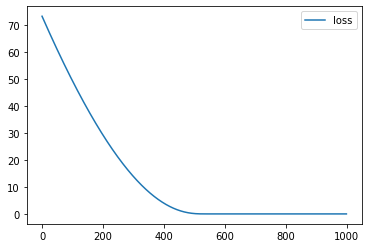

In [57]:
loss_plot = pd.DataFrame(ai.history.history)
loss_plot.plot()

In [58]:
ai.evaluate(x_test,y_test)

1/1 [==============================] - 0s 75ms/step - loss: 0.0034


0.0034224202390760183

In [88]:
from tensorflow.keras.metrics import RootMeanSquaredError as rmse

err = rmse()
preds = ai.predict(x_test)
err(y_test,preds)

1/1 [==============================] - 0s 18ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.058501456>

In [79]:
err = rmse()
print("Root Mean Squred Error:",err(y_test,preds).numpy())

Root Mean Squred Error: 0.058501456


In [89]:
x_n1 = [[30]]
x_n_n = scaler.transform(x_n1)
ai.predict(x_n_n)

1/1 [==============================] - 0s 30ms/step


array([[150.07175]], dtype=float32)